# Obtendo dados

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
import cv2
%matplotlib notebook 
import matplotlib.pyplot as plt

In [16]:
import os

In [3]:
from xml.dom import minidom

In [13]:
dataDir = "data/icdar/"
data = minidom.parse(dataDir + 'char.xml')
data = data.getElementsByTagName('image')

In [101]:
# Pega as labels
train_labels = []
for i in range(len(data)):
    train_labels.append(data[i].attributes['tag'].value)

train_labels = np.array(train_labels)

In [147]:
data[i].attributes['file'].value.split("/")[2]

'6185.jpg'

In [47]:
train_labels[:10]

array(['s', 'e', 'l', 'f', 'a', 'd', 'h', 'e', 's', 'i'], dtype='<U1')

In [152]:
def getFeaturesLabels():
    features = []
    labels = []
    
    files = os.listdir(dataDir)
    
    for f in files:
        if f == "char.xml":
            continue
        
        for d in data:
            label = d.attributes['file'].value.split("/")[2]
            
            if label == f:
                labels.append(d.attributes['tag'].value)
                break
        
        img = cv2.imread(dataDir + f)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32,32))
        features.append(img)
    
    features = np.array(features)
    labels = np.array(labels)
    features = features.reshape(-1,32,32,1)
    
    return features, labels

In [153]:
train_features, train_labels = getFeaturesLabels()

### Visualizando dos dados

In [157]:
print(train_features.shape)
print(train_labels.shape)

(6185, 32, 32, 1)
(6185,)


<IPython.core.display.Javascript object>


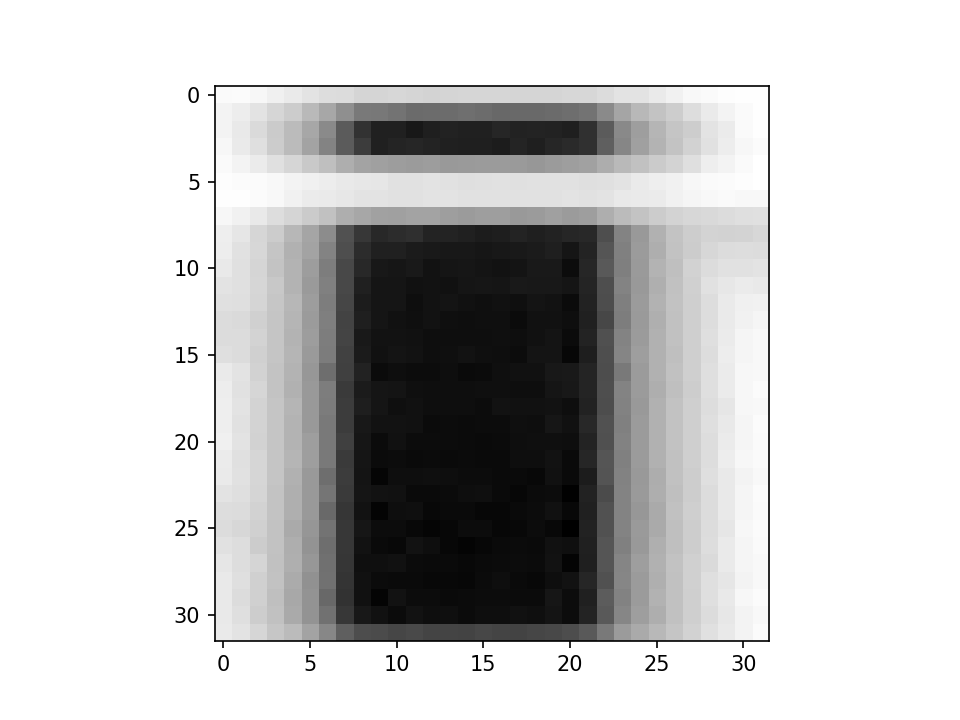

i


In [159]:
plt.figure()
plt.imshow(train_features[1].reshape(32,32), cmap='gray')
print(train_labels[1])

### Label one hot encode

In [160]:
np.unique(train_labels)

array(['!', '"', '&', "'", '(', ')', '-', '.', '0', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', ':', '?', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', '£', 'É', 'Ñ', 'é'], dtype='<U1')

Removendo dados do ICDAR

In [161]:
idx = np.where(train_labels == '!')
idx = np.append(idx, np.where(train_labels == '"'))
idx = np.append(idx, np.where(train_labels == '&'))
idx = np.append(idx, np.where(train_labels == "'"))
idx = np.append(idx, np.where(train_labels == '('))
idx = np.append(idx, np.where(train_labels == ')'))
idx = np.append(idx, np.where(train_labels == '-'))
idx = np.append(idx, np.where(train_labels == '.'))
idx = np.append(idx, np.where(train_labels == ':'))
idx = np.append(idx, np.where(train_labels == '?'))
idx = np.append(idx, np.where(train_labels == '£'))
idx = np.append(idx, np.where(train_labels == 'É'))
idx = np.append(idx, np.where(train_labels == 'Ñ'))
idx = np.append(idx, np.where(train_labels == 'é'))
idx = np.append(idx, np.where(train_labels == 'c'))
idx = np.append(idx, np.where(train_labels == 'k'))
idx = np.append(idx, np.where(train_labels == 'l'))
idx = np.append(idx, np.where(train_labels == 'o'))
idx = np.append(idx, np.where(train_labels == 'p'))
idx = np.append(idx, np.where(train_labels == 's'))
idx = np.append(idx, np.where(train_labels == 'u'))
idx = np.append(idx, np.where(train_labels == 'v'))
idx = np.append(idx, np.where(train_labels == 'w'))
idx = np.append(idx, np.where(train_labels == 'x'))
idx = np.append(idx, np.where(train_labels == 'y'))

In [162]:
train_features = np.delete(train_features, idx, axis = 0)
train_labels = np.delete(train_labels, idx)

In [163]:
np.unique(train_labels)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd',
       'e', 'f', 'g', 'h', 'i', 'j', 'm', 'n', 'q', 'r', 't'], dtype='<U1')

In [164]:
with open("model/classes.txt",'r') as f:
    classes = f.readlines()[0]

classes = np.array(classes.split(" ")[:-1])

Converte alguns caracteres das classes, pois o dataset é diferente

'k' -> 'K'

's' -> 'S'

'u' -> 'U'

'v' -> 'V'

'x' -> 'X'

'z' -> 'Z'

In [165]:
classes = np.where(classes=='k', 'K', classes) 
classes = np.where(classes=='s', 'S', classes) 
classes = np.where(classes=='u', 'U', classes) 
classes = np.where(classes=='v', 'V', classes) 
classes = np.where(classes=='x', 'X', classes) 
classes = np.where(classes=='z', 'Z', classes)
classes.sort()
print(classes)

['+' '-' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F'
 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X'
 'Y' 'Z' 'a' 'b' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'm' 'n' 'q' 'r' 't' 'Ç']


In [166]:
classes

array(['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a',
       'b', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'm', 'n', 'q', 'r', 't',
       'Ç'], dtype='<U1')

In [167]:
def oneHotEncode(labels):
    ''' Codifica os labels usando One Hot Encoding
    '''
    converted = []

    for i in labels:
        encoded = np.zeros(classes.shape[0])
        idx = np.where(classes == i)
        encoded[idx] = 1
        converted.append(encoded)

    converted = np.array(converted)

    return converted

def oneHotDecode(label):
    '''Informa qual é a classe a partir do label
       codificado
    '''
    index = np.argmax(label)

    return classes[index]

<IPython.core.display.Javascript object>


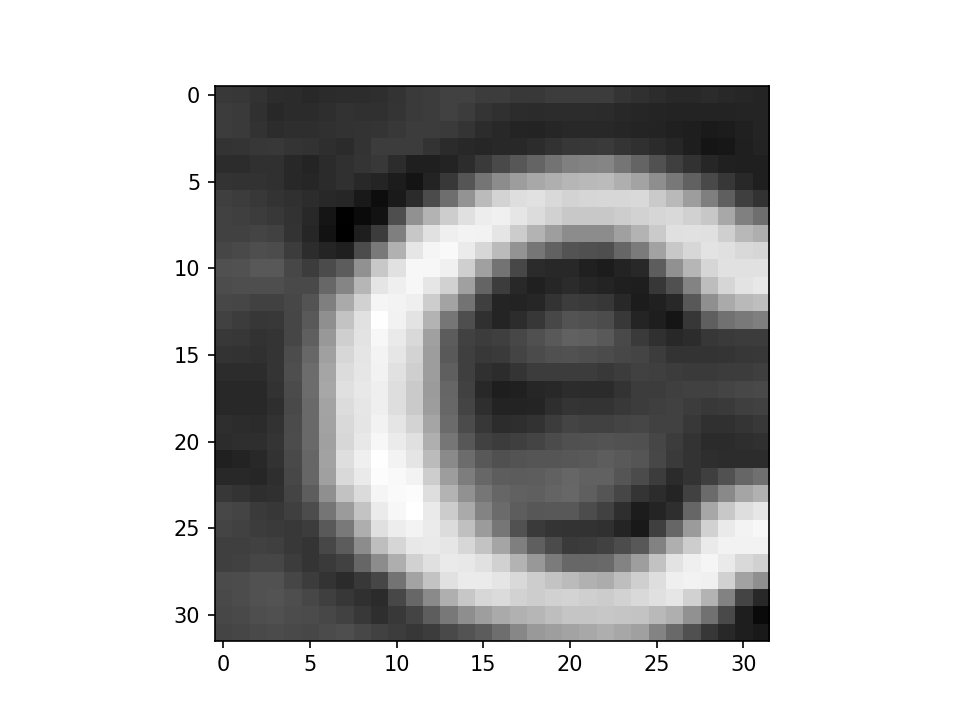

C


In [175]:
plt.figure()
plt.imshow(train_features[25].reshape(32,32), cmap='gray')
print(oneHotDecode(train_labels[25]))

# Divisão de dados

In [185]:
p = 0.8
idx = int(train_features.shape[0]*0.8)
test_features, test_labels = train_features[idx:], train_labels[idx:]
train_features, train_labels = train_features[:idx], train_labels[:idx]

# Carregando rede neural

In [176]:
dir = "model/"
model = keras.models.load_model(dir)

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 80)        800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 29, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 29, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 27, 64)        46144     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 13, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 13, 64)         0

# Criando uma rede

In [179]:
inputShape = train_features[0].shape[0]
numClasses = len(classes)

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 32


In [180]:
model = keras.Sequential()

model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))

model.add(keras.layers.Conv2D(80, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation='softmax'))

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 80)        800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 29, 80)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 29, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 27, 64)        46144     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 13, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 13, 64)         0

# Retreinando a rede

In [182]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
checkDir = "checkpoint/"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkDir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [189]:
history = model.fit(train_features, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_features, test_labels), callbacks=[model_checkpoint_callback])

Epoch 1/10
16/16 [==============================] - 4s 253ms/step - loss: 0.4084 - accuracy: 0.8788 - val_loss: 1.0960 - val_accuracy: 0.7343
Epoch 2/10
16/16 [==============================] - 4s 255ms/step - loss: 0.3984 - accuracy: 0.8884 - val_loss: 1.1076 - val_accuracy: 0.7283
Epoch 3/10
16/16 [==============================] - 4s 254ms/step - loss: 0.3979 - accuracy: 0.8867 - val_loss: 1.0917 - val_accuracy: 0.7303
Epoch 4/10
16/16 [==============================] - 4s 253ms/step - loss: 0.3688 - accuracy: 0.8968 - val_loss: 1.0918 - val_accuracy: 0.7274
Epoch 5/10
16/16 [==============================] - 4s 258ms/step - loss: 0.3629 - accuracy: 0.8921 - val_loss: 1.0849 - val_accuracy: 0.7500
Epoch 6/10
16/16 [==============================] - 4s 255ms/step - loss: 0.3366 - accuracy: 0.9020 - val_loss: 1.0975 - val_accuracy: 0.7303
Epoch 7/10
16/16 [==============================] - 4s 255ms/step - loss: 0.3269 - accuracy: 0.9062 - val_loss: 1.0861 - val_accuracy: 0.7362
Epoch 

# Acurácia da rede

In [190]:
_, accuracy = model.evaluate(train_features, train_labels)
print("Acurácia do modelo nos dados de treino: %.2f%%" % (accuracy*100.0))

127/127 [==============================] - 1s 10ms/step - loss: 0.1350 - accuracy: 0.9751
Acurácia do modelo nos dados de treino: 97.51%


# Testar

In [191]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False, threshold = 0):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
        
    img = img.reshape((1,32,32,1))
    
    return img


def getChar(x, verbose = 0, threshold = 0.45):
    label = model.predict(x, batch_size=1)
    
    if verbose == 1:
        print(label)
    elif verbose == 2:
        print(np.amax(label[0]))
    
    if np.amax(label[0]) < threshold:
        print(np.amax(label[0]))
        char = '#NADA'
    else:
        char = oneHotDecode(label)
    
    return char

<IPython.core.display.Javascript object>


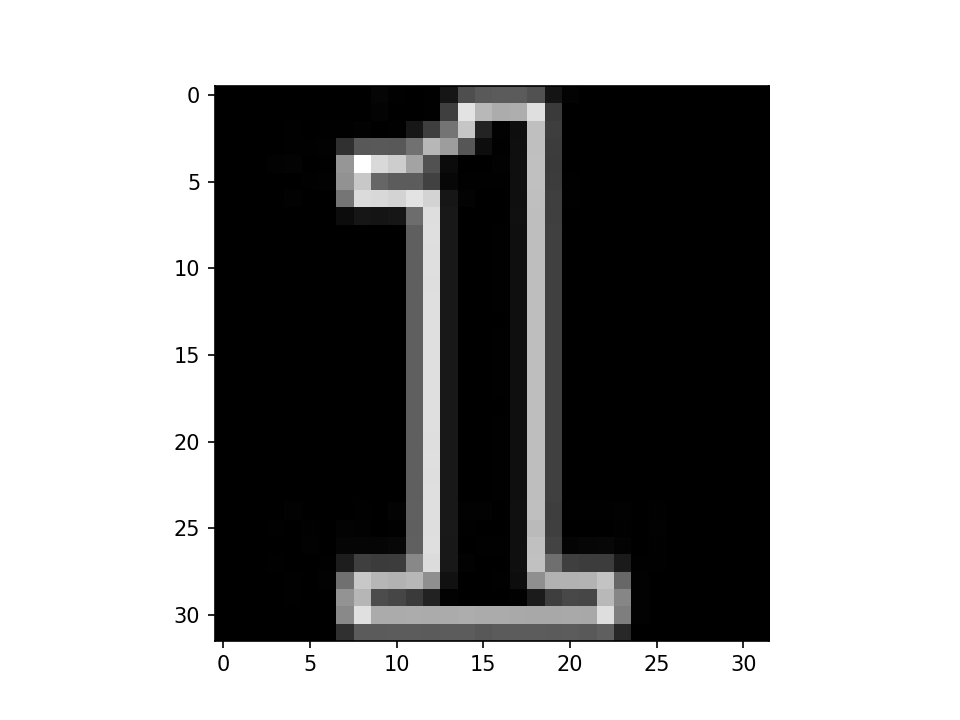

O caractere reconhecido foi L


In [192]:
x = loadImage("testes/real12.png", True)
c = getChar(x, threshold = 0.3)
print("O caractere reconhecido foi %s" % c)

<IPython.core.display.Javascript object>


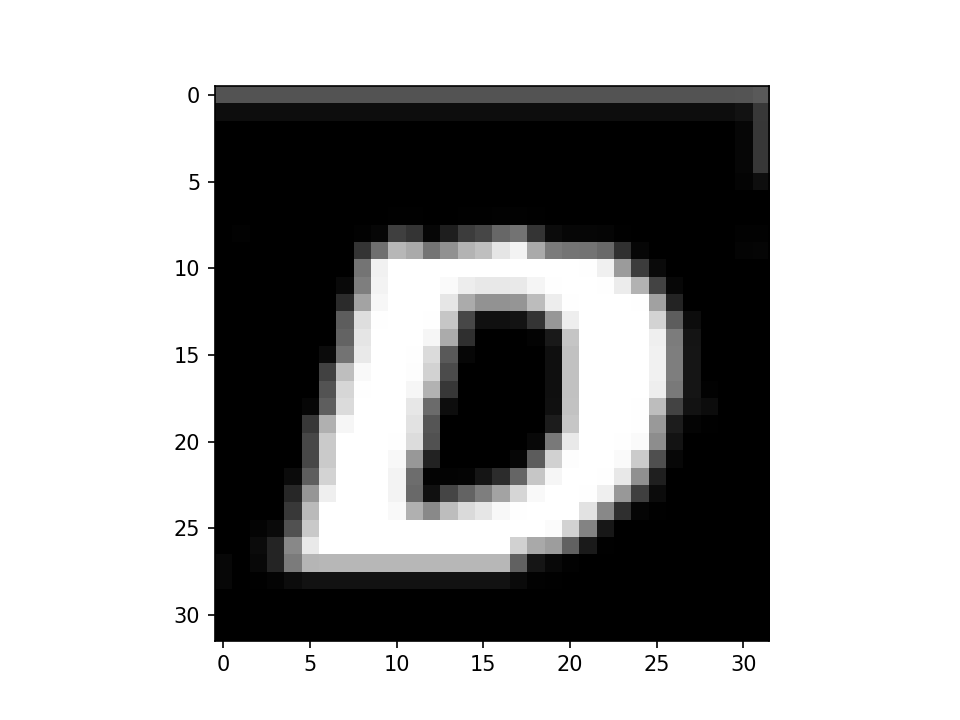

O caractere reconhecido foi D


In [193]:
x = loadImage("testes/real8.png", True)
c = getChar(x, threshold = 0.3)
print("O caractere reconhecido foi %s" % c)

<IPython.core.display.Javascript object>


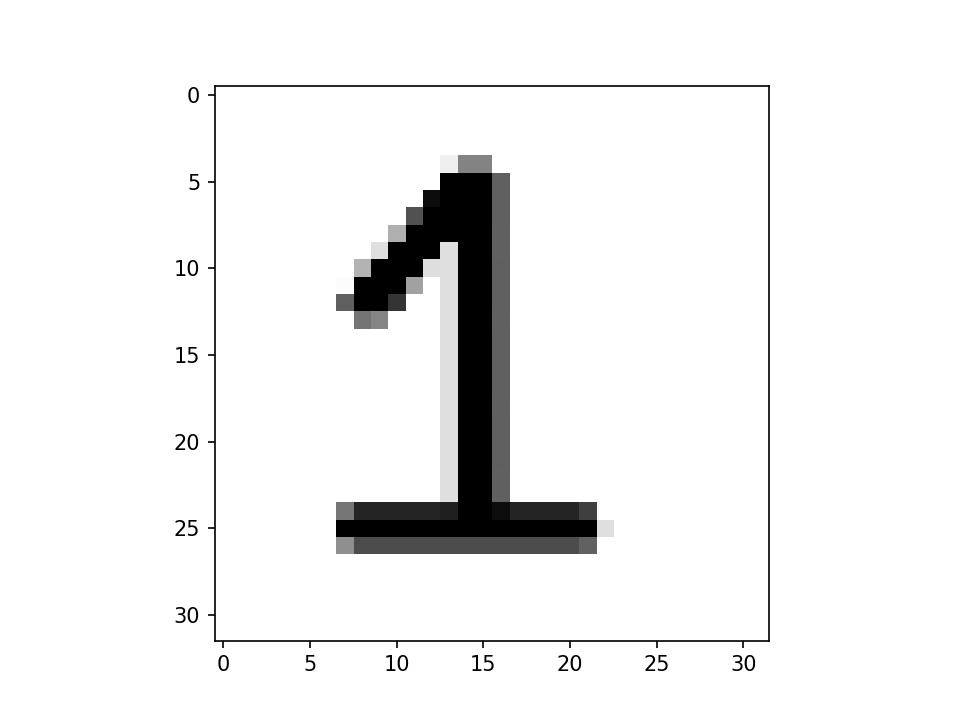

O caractere reconhecido foi A


In [206]:
x = loadImage("testes/letra.png", True)
c = getChar(x, threshold = 0.2)
print("O caractere reconhecido foi %s" % c)